In [3]:
!pip install neo4j==4.4.2

In [2]:
# Import modules from neo4j library
from neo4j import GraphDatabase, basic_auth

# Establish connection with neo4j database
# mention your host, port, username & password(default port is 7687 and default host is localhost)

driver = GraphDatabase.driver("bolt://localhost:7687", auth = basic_auth("neo4j","12345"))

# create a neo4j session in python

session = driver.session()

## Look at community 382710

In [3]:
import pandas as pd

# store neo4j query as a string

query='''
match (u:User {lp:392710})-[:TWEETED]-(t:Tweet)
return u.name, u.favorites, u.friends, u.followers, u.location, \
u.joining_year,u.pageRank, u.outDegree, t.created_at, t.source, t.text, t.tweet_id
'''

result = session.run(query)

df=pd.DataFrame(dict(item) for item in result)

df.head()

,u.name,u.favorites,u.friends,u.followers,u.location,u.joining_year,u.pageRank,u.outDegree,t.created_at,t.source,t.text,t.tweet_id
0,gnomestrotter,10,18,5,Galesburg| MI,2022,0.150000,1.0,2022-02-26T00:58:54.000Z,Twitter for iPhone,The urban jungle clouds all creativity as the ...,1497375586037108741
1,GreenhouseComms,15582,7699,17609,Bristol | London UK,2010,0.151899,14.0,2022-02-18T13:59:35.000Z,Twitter Web App,People like Bismark Kpabitey a cocoa farmer f...,1494672947642052612
2,GreenhouseComms,15582,7699,17609,Bristol | London UK,2010,0.151899,14.0,2022-02-28T09:15:27.000Z,Twitter Web App,Greenhouse Morning News is out! Top stories: ...,1498225322759704576
3,GreenhouseComms,15582,7699,17609,Bristol | London UK,2010,0.151899,14.0,2022-02-18T13:59:38.000Z,Twitter Web App,🚨 In the next few decades areas across the wo...,1494672962418622468
4,GreenhouseComms,15582,7699,17609,Bristol | London UK,2010,0.151899,14.0,2022-02-28T12:31:23.000Z,Twitter Web App,🚨 The headlines: 🌎 Impacts widespread some i...,1498274632419483648


In [4]:
# look at the top location

df['u.location'].value_counts().head(20)

Earth| Orion Arm| Milky Way      315
Planet Earth World Citizen       171
love light peace joy             165
Abuja| Nigeria                   119
Bonn| Germany                    106
India                             97
New Delhi| India                  85
Los Angeles| CA                   80
Africa                            78
Worldwide                         75
New York| USA                     72
New Songhees (View Royal)| BC     71
London                            63
Fuengirola                        60
Japan                             57
Nairobi| Kenya                    56
internet                          56
jph@jphoganorg                    48
Europe                            45
London| England                   42
Name: u.location, dtype: int64

In [5]:
# look at the top user based on pagerank

df.groupby(['u.name', 'u.pageRank'])['t.tweet_id'].count().reset_index(name="numRetweets").sort_values(by='u.pageRank', ascending=False)

,u.name,u.pageRank,numRetweets
271,JFSebastian146,123.355000,3468
178,EkeleJiata,1.170882,66
108,ClaireKraatz,1.168847,31
246,Harold_Steves,1.006242,28
147,DawnRoseTurner,0.841829,71
...,...,...,...
334,MikeHudema,0.150000,3
335,MikeNelson247,0.150000,4
337,MikeyGreenMusic,0.150000,2
338,MirrorMoving,0.150000,2


In [6]:
df.describe()

,u.favorites,u.friends,u.followers,u.joining_year,u.pageRank,u.outDegree
count,9.136000e+03,9136.000000,9.136000e+03,9136.000000,9136.000000,5668.000000
mean,1.414334e+05,4046.469790,1.843904e+04,2014.612303,46.966276,56.010586
std,1.619820e+05,6251.321223,8.906106e+04,3.755453,59.755634,442.312354
min,0.000000e+00,0.000000,0.000000e+00,2006.000000,0.150000,1.000000
25%,1.515000e+03,259.000000,3.047500e+02,2013.000000,0.150000,2.000000
50%,1.460400e+04,3579.000000,6.399000e+03,2013.000000,0.277513,5.500000
75%,3.400570e+05,6158.000000,1.668500e+04,2017.000000,123.355000,11.000000
max,1.297003e+06,115275.000000,4.639502e+06,2022.000000,123.355000,5504.000000


In [7]:
df_joining_year=df['u.joining_year'].value_counts().reset_index()
df_joining_year.columns=['joining_year', 'numUsers']
df_joining_year.sort_values(by='joining_year')

,joining_year,numUsers
16,2006,1
15,2007,10
14,2008,76
3,2009,584
4,2010,490
9,2011,310
12,2012,183
0,2013,3926
6,2014,378
7,2015,374


<AxesSubplot:xlabel='joining_year', ylabel='numUsers'>

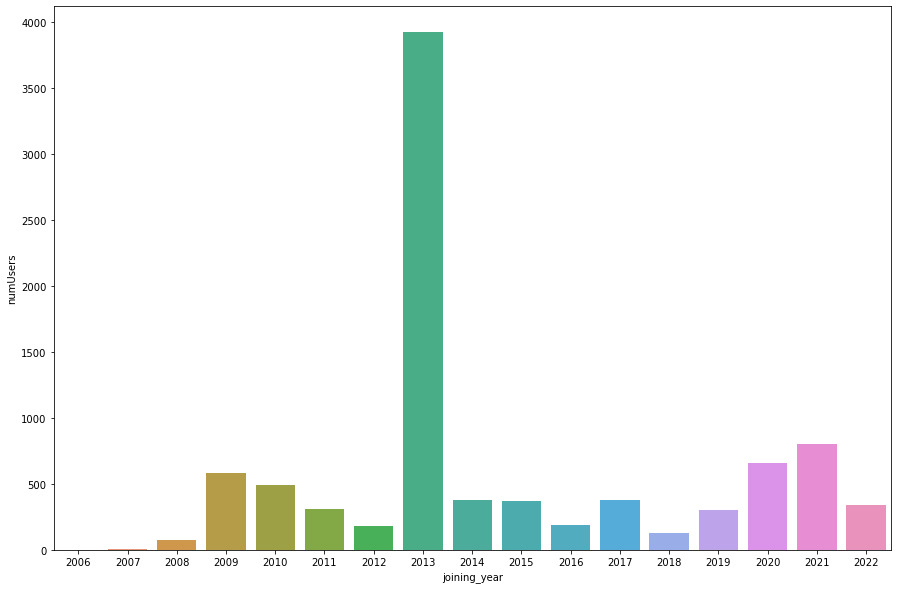

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10)) 

sns.barplot(x='joining_year', y='numUsers', data=df_joining_year)

In [9]:
# pro-processing/clean text 

import pandas as pd
import nltk
import re
from nltk.stem import WordNetLemmatizer
import warnings

warnings.simplefilter("ignore", DeprecationWarning)

stemmer = WordNetLemmatizer()

nltk.download('stopwords')

en_stop = nltk.corpus.stopwords.words('english')

# add additional stop words

additional_stopwords=['rt', 'climate', '#climate', 'change', '#climatechange', 'dey', 'amp']

en_stop=en_stop+additional_stopwords

def text_cleaning(doc):
    
     # remove https
    
    doc=re.sub(r"https.+", " ", doc)

    # remove special characters, keep character, number, # and @
    
    doc=re.sub(r"[^a-zA-Z0-9#@]", " ", str(doc))
    
    # remove single character data                   
       
    doc = re.sub(r"\s+[a-zA-Z]\s+", ' ', doc)
    
    # change more than one white space to one white space

    doc = re.sub(r'\s+', ' ', doc)
                      
    doc = re.sub(r'^b\s+', '', doc)
                 
    doc = doc.lower()

    words = doc.split()
    
    # Remove numbers, but not words that contain numbers.
    words = [word for word in words if not word.isnumeric()]
             
    words = [stemmer.lemmatize(word) for word in words]
    words = [word for word in words if word not in en_stop]
    words = [word for word in words if len(word) >= 3]

    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['cleaned_words']=df['t.text'].apply(text_cleaning)

In [11]:
df[['t.text', 'cleaned_words']].head()

,t.text,cleaned_words
0,The urban jungle clouds all creativity as the ...,"[urban, jungle, cloud, creativity, hard, concr..."
1,People like Bismark Kpabitey a cocoa farmer f...,"[people, like, bismark, kpabitey, cocoa, farme..."
2,Greenhouse Morning News is out! Top stories: ...,"[greenhouse, morning, news, top, story, #un, r..."
3,🚨 In the next few decades areas across the wo...,"[next, decade, area, across, world, could, bec..."
4,🚨 The headlines: 🌎 Impacts widespread some i...,"[headline, impact, widespread, irreversible, 3..."


In [12]:
top100_words=df['cleaned_words'].explode().value_counts().head(100)

In [ ]:
# install wordcloud. You only need to install once

#!pip install wordcloud

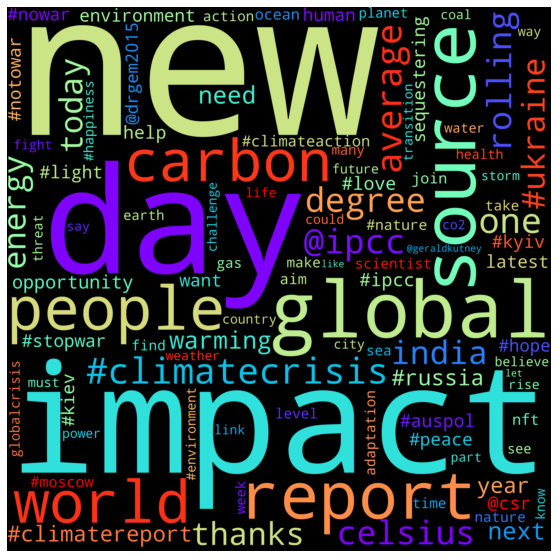

In [13]:
# create a word cloud from word frequency
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_words)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Look at another community 45435

In [14]:
import pandas as pd

# store neo4j query as a string

query='''
match (u:User {lp:45435})-[:TWEETED]-(t:Tweet)
return u.name, u.favorites, u.friends, u.followers, u.location, \
u.joining_year,u.pageRank, u.outDegree, t.created_at, t.source, t.text, t.tweet_id
'''

result = session.run(query)


df=pd.DataFrame(dict(_) for  _ in result)

df.head()

,u.name,u.favorites,u.friends,u.followers,u.location,u.joining_year,u.pageRank,u.outDegree,t.created_at,t.source,t.text,t.tweet_id
0,nickygavron,2595,1181,4814,London,2010,0.150000,2.0,2022-02-17T15:24:16.000Z,Twitter Web App,Medical professionals spell it out: fossil fue...,1494331873232752644
1,nickygavron,2595,1181,4814,London,2010,0.150000,2.0,2022-02-17T15:28:25.000Z,Twitter Web App,Medical professionals spell it out: fossil fue...,1494332918369439751
2,SolarHomeIRL,0,577,1097,Wexford| Ireland,2021,1.666734,1.0,2022-02-21T17:42:44.000Z,Twitter for Android,RT @wemoveEU: ⚡️Finding alternative ways of po...,1495816270054567937
3,SolarHomeIRL,0,577,1097,Wexford| Ireland,2021,1.666734,1.0,2022-02-18T12:58:03.000Z,Twitter for Android,Heat from #SolarThermal is free and 100% renew...,1494657466033967105
4,SolarHomeIRL,0,577,1097,Wexford| Ireland,2021,1.666734,1.0,2022-02-28T13:56:39.000Z,Twitter for Android,Lots hot takes from climate activists today on...,1498296088876527619


In [73]:
# look at the top location

df['u.location'].value_counts().head(20)

USA                               858
Catalunya                         134
New Delhi| India                  127
New Jersey| USA                   103
Planet Earth                       80
Wexford| Ireland                   49
Kolkata| India                     48
Brussels                           47
Earth                              43
Ireland                            41
Dublin City| Ireland               37
Australia                          36
Ciudad de México                   34
NYC                                33
London                             32
Hat Head NSW                       32
Manahatta| unceded Lenape land     27
Bellevue| WA                       26
Vancouver| Canada                  23
Dublin                             23
Name: u.location, dtype: int64

In [74]:
# look at the top user based on pagerank

df.groupby(['u.name', 'u.pageRank'])['t.tweet_id'].count().reset_index(name="numRetweets").sort_values(by='u.pageRank', ascending=False)

,u.name,u.pageRank,numRetweets
68,Eco1stArt,29.718622,858
210,SolarHomeIRL,1.666734,49
24,ByHedge,0.835078,33
200,Sdg13Un,0.721901,107
8,Al_Maldives,0.676335,61
...,...,...,...
253,ahmdshohaib,0.150000,1
256,angira,0.150000,1
257,animaleuropeRMP,0.150000,1
258,anitaw1610,0.150000,2


In [105]:
df_joining_year=df['u.joining_year'].value_counts().reset_index()
df_joining_year.columns=['joining_year', 'numUsers']
df_joining_year.sort_values(by='joining_year')

,joining_year,numUsers
15,2007,4
7,2008,152
3,2009,293
0,2010,1077
5,2011,197
2,2012,382
6,2013,172
4,2014,285
8,2015,148
12,2016,61


<AxesSubplot:xlabel='joining_year', ylabel='numUsers'>

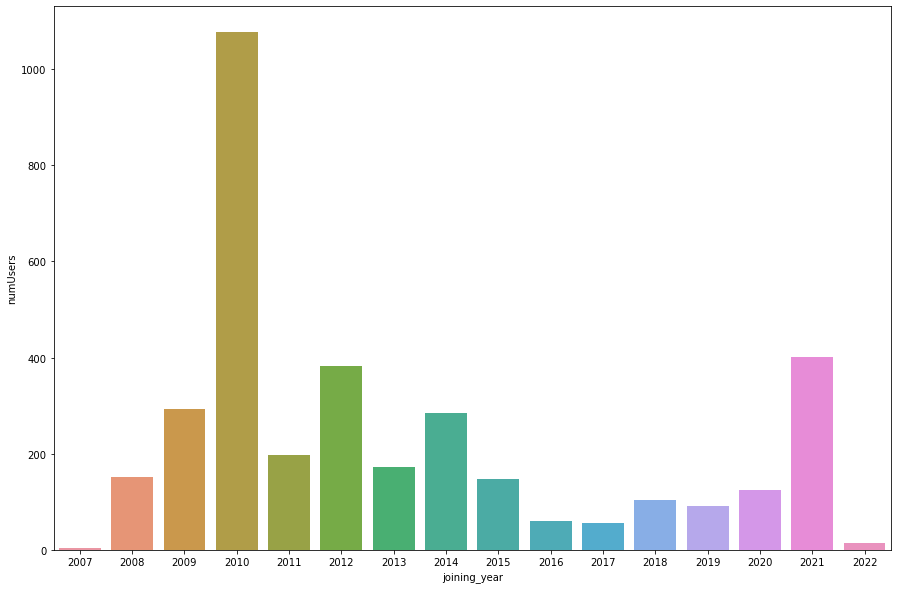

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10)) 

sns.barplot(x='joining_year', y='numUsers', data=df_joining_year)

In [75]:
df['cleaned_words']=df['t.text'].apply(text_cleaning)

top100_words=df['cleaned_words'].explode().value_counts().head(100)

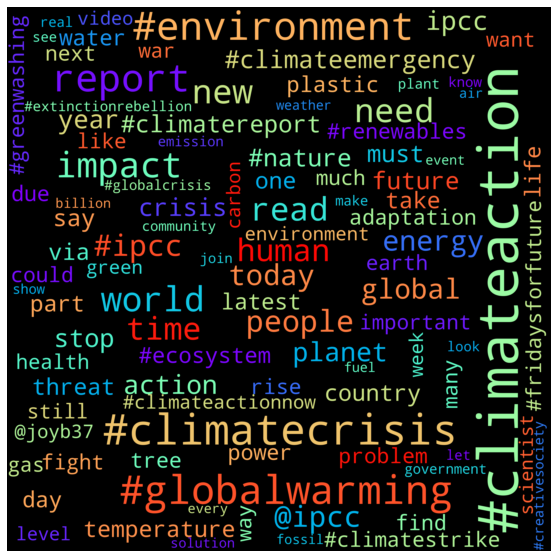

In [76]:
# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_words)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Look at community 6781

In [107]:
import pandas as pd

# store neo4j query as a string

query='''
match (u:User {lp:6781})-[:TWEETED]-(t:Tweet)
return u.name, u.favorites, u.friends, u.followers, u.location, \
u.joining_year,u.pageRank, u.outDegree, t.created_at, t.source, t.text, t.tweet_id
'''

result = session.run(query)


df=pd.DataFrame(dict(_) for  _ in result)

df.head()

,u.name,u.favorites,u.friends,u.followers,u.location,u.joining_year,u.pageRank,u.outDegree,t.created_at,t.source,t.text,t.tweet_id
0,PennFuture,6605,1977,6277,Pennsylvania,2009,0.152833,3,2022-02-24T18:01:45.000Z,Twitter Web App,This is a critically important conversation a...,1496908220908318720
1,PennFuture,6605,1977,6277,Pennsylvania,2009,0.152833,3,2022-02-25T18:23:42.000Z,Twitter Web App,RT @GovernorTomWolf: I've put Pennsylvania on ...,1497276130847600650
2,NYCA_Nepal,1255,767,674,None,2019,0.174160,7,2022-02-20T17:53:43.000Z,Twitter for Android,The common place for climate change education ...,1495456648701247489
3,NYCA_Nepal,1255,767,674,None,2019,0.174160,7,2022-02-26T09:45:51.000Z,Twitter for Android,RT @AniDasguptaWRI: Healthy ecosystems underpi...,1497508196960772098
4,NYCA_Nepal,1255,767,674,None,2019,0.174160,7,2022-02-20T13:49:54.000Z,Twitter for Android,RT @icimod: 📢 #PhotoContest Alert! 🇳🇵 Are you...,1495395288499974146


In [78]:
# look at the top location

df['u.location'].value_counts().head(20)

London| UK                   330
Planet Earth                 224
The Planet                   179
Jamaica- Trinidad &Tobago    110
Dhaka                         76
United Kingdom                74
NY                            71
London                        66
Global                        65
UK                            63
Albuquerque                   45
Penn State University| PA     43
USA                           38
Washington| DC                38
Cox's Bazar| Bangladesh       37
India                         36
Dhaka| Bangladesh             34
Mohali| India                 34
Geneva| Switzerland           31
everywhere                    29
Name: u.location, dtype: int64

In [79]:
# look at the top user based on pagerank

df.groupby(['u.name', 'u.pageRank'])['t.tweet_id'].count().reset_index(name="numRetweets").sort_values(by='u.pageRank', ascending=False)

,u.name,u.pageRank,numRetweets
183,SaleemulHuq,3.787808,321
134,Living4Earth,2.052930,224
225,YoussufSabek,1.812031,134
85,FFFinBD,1.485353,65
71,ECOWARRIORSS,1.142690,140
...,...,...,...
170,ProfMarkHowden,0.150000,1
174,RamprakashMina,0.150000,7
175,ReligionEnviro,0.150000,5
180,SDG_Academy,0.150000,2


In [108]:
df_joining_year=df['u.joining_year'].value_counts().reset_index()
df_joining_year.columns=['joining_year', 'numUsers']
df_joining_year.sort_values(by='joining_year')

,joining_year,numUsers
15,2007,4
11,2008,120
0,2009,674
5,2010,203
6,2011,171
10,2012,123
4,2013,266
14,2014,50
3,2015,394
8,2016,155


<AxesSubplot:xlabel='joining_year', ylabel='numUsers'>

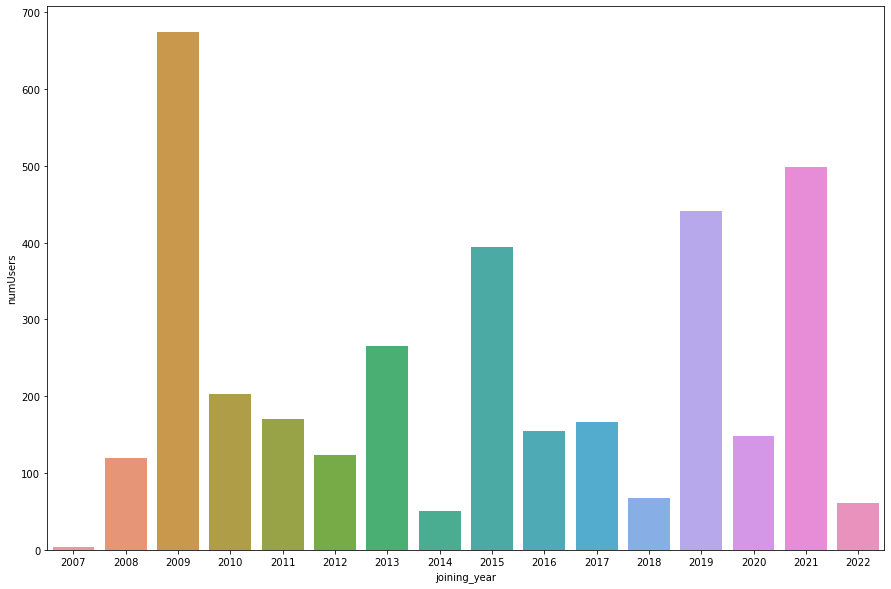

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10)) 

sns.barplot(x='joining_year', y='numUsers', data=df_joining_year)

In [80]:
df['cleaned_words']=df['t.text'].apply(text_cleaning)

top100_words=df['cleaned_words'].explode().value_counts().head(100)

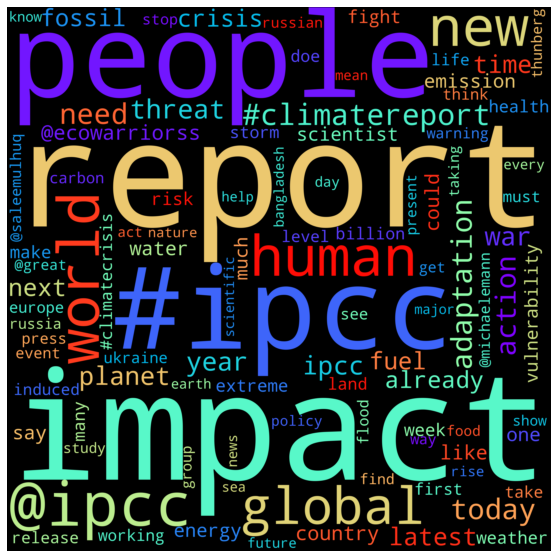

In [81]:
# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_words)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# you may close the connection after finishing with the queries

session.close()